# Applied Machine Learning : Predicting Employee Productivity
Names: Alaa Eddine Hergli & Meriem El Boudouhi 

Date: 23.12.2025



## 1. Zielsetzung

Ziel dieses Projekts ist die Analyse und Vorhersage der Mitarbeiterproduktivität
auf Basis eines strukturierten Datensatzes mit individuellen, organisatorischen
und arbeitsbezogenen Merkmalen. Die Zielvariable der Analyse ist die
Mitarbeiterproduktivität, gemessen in Prozent.

Durch den Einsatz überwachter Machine-Learning-Methoden sollen Zusammenhänge
im Datensatz identifiziert und die Einflussfaktoren auf die Produktivität
bestimmt werden. Das entwickelte Vorhersagemodell soll datenbasierte
Entscheidungsprozesse im Bereich des Human Resource Management unterstüt

## 2. Datensatzbeschreibung

Der verwendete Datensatz enthält Informationen zu Mitarbeitenden eines
Unternehmens und umfasst sowohl demografische als auch arbeitsbezogene
Merkmale. Zu den erfassten Variablen zählen unter anderem Alter, Geschlecht,
Abteilung, Position, Gehalt, Eintrittsdatum sowie verschiedene leistungsbezogene
Kennzahlen.

Die Zielvariable (Target) des Datensatzes ist die Mitarbeiterproduktivität
(Productivity (%)), die als kontinuierlicher numerischer Prozentwert im
Bereich von 0 bis 100 angegeben ist. Da es sich bei der Zielvariable um eine
kontinuierliche Größe handelt, liegt ein überwachtes Lernproblem in Form einer
Regressionsaufgabe (supervised learning – regression) vor.

Zusätzlich enthält der Datensatz sowohl numerische als auch kategoriale
Merkmale, was eine entsprechende Datenvorverarbeitung, wie etwa die
Kodierung kategorialer Variablen und die Skalierung numerischer Merkmale, vor der
Modellierung erforderlich macht.


## 3. Daten laden

Datensatz laden

Erste fünf Zeilen anzeigen

In [2]:
import pandas as pd
File_name = "hr_dashboard_data.csv" #"data.csv"
df = pd.read_csv(File_name)
df.head(3)

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292


## 4. Datenqualitätsprüfung

In [3]:
# Anzahl der Zeilen und Spalten
df.shape

(200, 11)

Der Datensatz umfasst insgesamt 200 Beobachtungen mit 11 Variablen, was einer
Stichprobe von 200 Mitarbeitenden mit jeweils 11 erfassten Merkmalen entspricht.

In [12]:
# Übersicht über Datentypen und fehlende Werte
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   200 non-null    object 
 1   Age                    200 non-null    int64  
 2   Gender                 200 non-null    object 
 3   Projects Completed     200 non-null    int64  
 4   Productivity (%)       200 non-null    int64  
 5   Satisfaction Rate (%)  200 non-null    int64  
 6   Feedback Score         200 non-null    float64
 7   Department             200 non-null    object 
 8   Position               200 non-null    object 
 9   Joining Date           200 non-null    object 
 10  Salary                 200 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 17.3+ KB


Die Datenqualitätsprüfung zeigt, dass alle 11 Variablen vollständig sind.
Für keine der Spalten liegen fehlende Werte vor. Die Daten umfassen sowohl
numerische als auch kategoriale Variablen. Eine Behandlung fehlender Werte
ist daher nicht erforderlich.

In [13]:
# Prüfung auf doppelte Datensätze
df.duplicated().sum()

np.int64(0)

Die Überprüfung auf doppelte Datensätze ergab, dass keine Duplikate im Datensatz
vorhanden sind. Eine Bereinigung durch das Entfernen doppelter Einträge ist daher
nicht erforderlich.

In [14]:
# Deskriptive Statistik der Zielvariable Produktivität
df["Productivity (%)"].describe()

count    200.000000
mean      46.755000
std       28.530068
min        0.000000
25%       23.000000
50%       45.000000
75%       70.000000
max       98.000000
Name: Productivity (%), dtype: float64

Die Zielvariable „Produktivität (%)“ wurde auf Plausibilität überprüft.
Die Werte liegen im Bereich von 0 % bis 98 % und damit innerhalb eines
realistischen und erwartbaren Intervalls. Eine Korrektur der Zielvariable
ist daher nicht erforderlich.

## 5. Datenreinigung

Auf Basis der durchgeführten Datenqualitätsprüfung wurde festgestellt, dass der Datensatz vollständig ist und keine Duplikate enthält. Eine Datenbereinigung war daher nicht erforderlich.

## 6. Explorative Datenanalyse


Ziel der explorativen Datenanalyse ist es, einen ersten Überblick über die
Verteilung der Variablen sowie mögliche Zusammenhänge mit der Zielvariable
„Produktivität (%)“ zu erhalten. Die Analyse dient als Grundlage für die
nachfolgende Modellierung.

In [16]:
# Häufigkeitsverteilung der Abteilungen
df["Department"].value_counts()

Department
Sales        47
Marketing    42
Finance      41
IT           38
HR           32
Name: count, dtype: int64

In [17]:
#Häufigkeitsverteilung nach Geschlecht
df["Gender"].value_counts()



Gender
Male      100
Female    100
Name: count, dtype: int64

In [18]:
# Häufigkeitsverteilung der Positionen
df["Position"].value_counts()

Position
Manager             40
Junior Developer    35
Analyst             33
Team Lead           32
Intern              30
Senior Developer    30
Name: count, dtype: int64

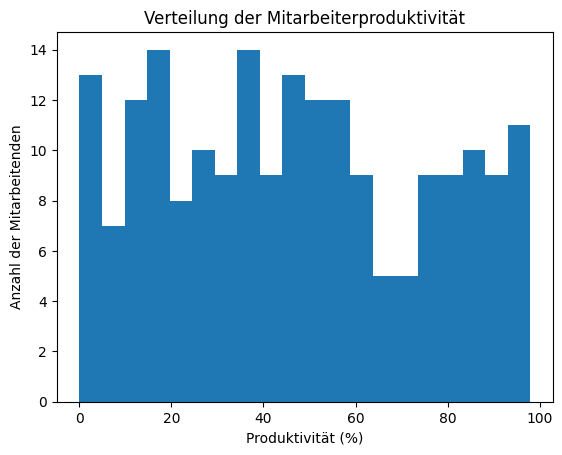

In [19]:
# Verteilung der Produktivität (%)
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["Productivity (%)"], bins=20)
plt.xlabel("Produktivität (%)")
plt.ylabel("Anzahl der Mitarbeitenden")
plt.title("Verteilung der Mitarbeiterproduktivität")
plt.show()

Das Histogramm zeigt eine breite Verteilung der Mitarbeiterproduktivität über
den gesamten Wertebereich. Die meisten Beobachtungen liegen im mittleren
Produktivitätsbereich, während sehr niedrige und sehr hohe Produktivitätswerte
seltener auftreten. Insgesamt weist die Verteilung auf eine heterogene
Belegschaft mit unterschiedlichen Leistungsniveaus hin.

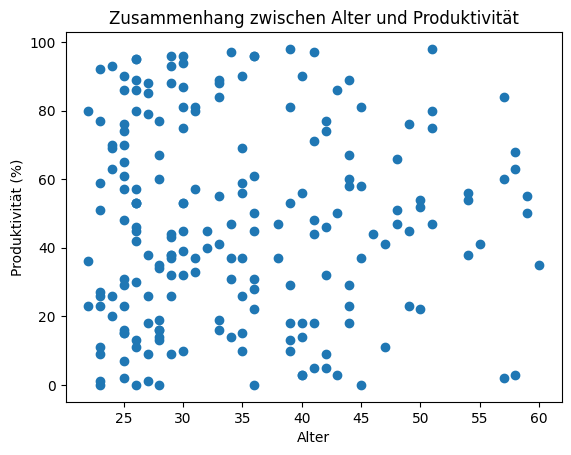

In [20]:
# Zusammenhang zwischen Alter und Produktivität
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df["Age"], df["Productivity (%)"])
plt.xlabel("Alter")
plt.ylabel("Produktivität (%)")
plt.title("Zusammenhang zwischen Alter und Produktivität")
plt.show()

Das Streudiagramm zeigt den Zusammenhang zwischen dem Alter der Mitarbeitenden
und ihrer Produktivität. Es ist kein klarer linearer Zusammenhang erkennbar,
da die Produktivitätswerte über alle Altersgruppen hinweg stark variieren.
Dies deutet darauf hin, dass das Alter allein kein ausschlaggebender Faktor
für die Produktivität ist und weitere Variablen berücksichtigt werden müssen.


## 7. Zusammenfassung der explorativen Analyse


Im Rahmen der explorativen Datenanalyse wurde der Datensatz hinsichtlich Struktur, Qualität und inhaltlicher Zusammenhänge untersucht. Die Analyse zeigte, dass der Datensatz vollständig ist und eine heterogene Verteilung der Mitarbeiterproduktivität aufweist. Erste explorative Auswertungen lieferten Hinweise darauf, dass einzelne Merkmale allein keine ausreichende Erklärung der Produktivität liefern, wodurch der Einsatz von Machine-Learning-Verfahren im nächsten Schritt gerechtfertigt ist

## 8. Preprocessing

Target (y) = das, was du vorhersagen willst. Bei euch: Productivity (%).

Features (X) = alle Spalten, die du benutzt, um das Target vorherzusagen (Age, Salary, Department, …).

ML-Modelle können nur mit Zahlen rechnen.
Deshalb müssen Text-Spalten wie Gender, Department, Position in Zahlen umgewandelt werden (One-Hot-Encoding).

Außerdem müssen wir komische Spalten entfernen, z. B. Name (ist eher ID, hilft dem Modell nicht sauber).

Wir trennen Target (y) von Features (X)

Wir stellen sicher: X ist nutzbar (keine kaputten Werte)

Wir machen aus Text (z.B. Department = “IT”) Zahlen, damit das Modell rechnen kann.

In [6]:
target = "Productivity (%)"

print("Target (y) column:", target)
print("All columns:", df.columns.tolist())

X = df.drop(columns=[target])
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)


Target (y) column: Productivity (%)
All columns: ['Name', 'Age', 'Gender', 'Projects Completed', 'Productivity (%)', 'Satisfaction Rate (%)', 'Feedback Score', 'Department', 'Position', 'Joining Date', 'Salary']
X shape: (200, 10)
y shape: (200,)


### Ein ML-Modell kann nicht rechnen mit Text wie:

Department = "IT"

Position = "Manager"

Gender = "Male"

Es kann nur rechnen mit Zahlen.

### Darum brauchen wir diese Trennung:

Numeric features = Zahlen (Age, Salary, Projects Completed, Feedback Score…)

Categorical features = Text/Kategorien (Gender, Department, Position…)

Wenn du das nicht machst, passiert:

Python/Sklearn gibt Fehler wie “could not convert string to float”

oder du baust ein Modell, das Müll lernt


In [7]:
import numpy as np

print("Data types:")
print(X.dtypes)

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nNumeric features:", numeric_features)
print("Categorical features:", categorical_features)





Data types:
Name                      object
Age                        int64
Gender                    object
Projects Completed         int64
Satisfaction Rate (%)      int64
Feedback Score           float64
Department                object
Position                  object
Joining Date              object
Salary                     int64
dtype: object

Numeric features: ['Age', 'Projects Completed', 'Satisfaction Rate (%)', 'Feedback Score', 'Salary']
Categorical features: ['Name', 'Gender', 'Department', 'Position', 'Joining Date']


### Name entfernen (drop)

Warum?
Name beschreibt nicht den Mitarbeiter “inhaltlich”, sondern ist nur ein Label.
Das Modell würde sonst “Namen auswendig lernen” statt echte Muster.

In [9]:
#Name rasuwerfen -- wir erstellen eine Kopie von df namens df3
#damit wir das Original df behalten
df3 = df.copy()
df3 = df3.drop(columns=['Name'])
df3.head(1) # wir testen ob es geklappt hat 


,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596


- `Joining Date` wird in ein echtes Datum umgewandelt  
- Aus dem Datum wird die **Betriebszugehörigkeit in Jahren** berechnet  
- Die ursprüngliche Datums-Spalte wird entfernt  
- Ergebnis: **numerisches Feature** für das Modell


In [13]:
#Name rasuwerfen -- wir erstellen eine Kopie von df namens df3
#damit wir das Original df behalten
df3 = df.copy()
df3 = df3.drop(columns=['Name'])
df3.head(1) # wir testen ob es geklappt hat 

#---------------------------------
# Joining Date als echtes Datum
jd = pd.to_datetime(df3["Joining Date"], format="%b-%y", errors="coerce")

# Referenzdatum = spätestes Datum im Datensatz
reference_date = jd.max()

# Tenure in Jahren zur Studienzeit
df3["TenureYears"] = (reference_date - jd).dt.days / 365.25


# 3) Original Joining Date droppen
df3 = df3.drop(columns=["Joining Date"])

df3.head(3)

,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Salary,TenureYears
0,25,Male,11,57,25,4.7,Marketing,Analyst,63596,2.001369
1,59,Female,19,55,76,2.8,IT,Manager,112540,23.000684
2,30,Male,8,87,10,2.4,IT,Analyst,66292,4.999316


## Aktualisierung von Features und Target

- `X` (Features) und `y` (Zielvariable) werden **neu erstellt**, da sich der Datensatz geändert hat  
- Zielvariable ist **Productivity (%)**  
- Alle **numerischen Features** (inkl. `TenureYears`) werden automatisch erkannt  
- Alle **kategorischen Features** werden getrennt erfasst  
- Kontrolle: Shapes und Beispielwerte werden ausgegeben

Ergebnis:  
Die Feature-Liste ist **konsistent** und bereit für Preprocessing und Modelltraining.


In [14]:

# 4) Neu: X und y wieder erstellen
target = "Productivity (%)"
X = df3.drop(columns=[target])
y = df3[target]
print("New X shape:", X.shape)
print("New y shape:", y.shape)
#X.head(3)
#y.head(3)

# 5) Features neu bestimmen
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)
print("\nTenureYears sample:", X["TenureYears"].head(3).tolist())


New X shape: (200, 9)
New y shape: (200,)
Numeric features: ['Age', 'Projects Completed', 'Satisfaction Rate (%)', 'Feedback Score', 'Salary', 'TenureYears']
Categorical features: ['Gender', 'Department', 'Position']

TenureYears sample: [2.001368925393566, 23.000684462696782, 4.999315537303217]


In [15]:
from sklearn.compose import ColumnTransformer  # wendet unterschiedliche Schritte auf unterschiedliche Spalten an
from sklearn.pipeline import Pipeline          # legt eine feste Reihenfolge von Verarbeitungsschritten fest
from sklearn.preprocessing import OneHotEncoder # wandelt Text/Kategorien in Zahlen (0/1-Spalten) um
from sklearn.impute import SimpleImputer        # ersetzt fehlende Werte (z.B. Median oder häufigster Wert)


### - Missing Values (fehlende Werte)

Manchmal sind Zellen leer. Ein Modell kann nicht rechnen mit “leer”.

Lösung: Du ersetzt leere Werte durch einen sinnvollen Standard.

Für Zahlen: Median

Median ist der “mittlere Wert”.
Warum Median und nicht Durchschnitt?

Durchschnitt kann durch extreme Werte kaputt gehen (z.B. ein sehr hoher Salary).

Median ist stabiler.

Für Kategorien: häufigster Wert

Wenn Department fehlt, setzt du z.B. “IT”, wenn das am häufigsten vorkommt.

**Hinweis:**  
Im aktuellen Datensatz sind **keine fehlenden Werte vorhanden**.  
Das Handling von Missing Values wurde trotzdem implementiert, um den Code
**robust und zukunftssicher** zu machen.

Falls später weitere Daten hinzukommen oder sich die Datenquelle ändert,
kann der Preprocessing-Schritt fehlende Werte automatisch korrekt behandeln,
ohne den Code anpassen zu müssen.


### - One-Hot Encoding (Text → Zahlen)

Beispiel Department hat Werte: IT, Marketing, Sales.

One-Hot macht daraus mehrere Spalten:

Dept_IT

Dept_Marketing

Dept_Sales

Wenn jemand IT ist, dann:

Dept_IT = 1

Dept_Marketing = 0

Dept_Sales = 0


In [17]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])


categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

X_transformed = preprocessor.fit_transform(X)
print("Original X shape:", X.shape)
print("Transformed X shape:", X_transformed.shape)
#X_transformed[:3] #.toarray()

Original X shape: (200, 9)
Transformed X shape: (200, 19)


## 9. Train/Test Split  
Warum teilen wir Daten in Train und Test?

Ein Modell kann “auswendig lernen”.
Wenn du es auf denselben Daten testest, auf denen es gelernt hat, sieht es immer gut aus — aber das ist Fake.

Darum:

Train-Daten: damit lernt das Modell.

Test-Daten: die sieht das Modell vorher nicht. Damit prüfen wir ehrlich, ob es wirklich “kann”.

Das ist wie:

Train = Übungsaufgaben

Test = echte Prüfung

Was bedeutet 80/20?

80% der Daten zum Lernen

20% zum Prüfen

Mit 200 Zeilen wären das ungefähr:

160 Train

40 Test

In [18]:
 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (160, 9)
X_test shape: (40, 9)
y_train shape: (160,)
y_test shape: (40,)


## 10. Baseline Model 
 
Ein Modell ist eine Mathe-Formel, die aus deinen Inputs (X) eine Vorhersage für y macht.

Wir haben:

X = 9 Features (Age, Salary, Department…)

y = Productivity (%)

Das Modell soll lernen:

“Welche Kombination von X führt zu welcher y?”

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

baseline_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", baseline_model)
])
baseline_pipe.fit(X_train, y_train)
print("Baseline trained ✅")


Baseline trained ✅


In [20]:
y_pred = baseline_pipe.predict(X_test)

print("First 5 predictions:", y_pred[:5])
print("First 5 actual values:", y_test.iloc[:5].tolist())


First 5 predictions: [44.25254962 57.57074455 42.07693576 64.09164374 51.09002123]
First 5 actual values: [18, 3, 93, 38, 19]


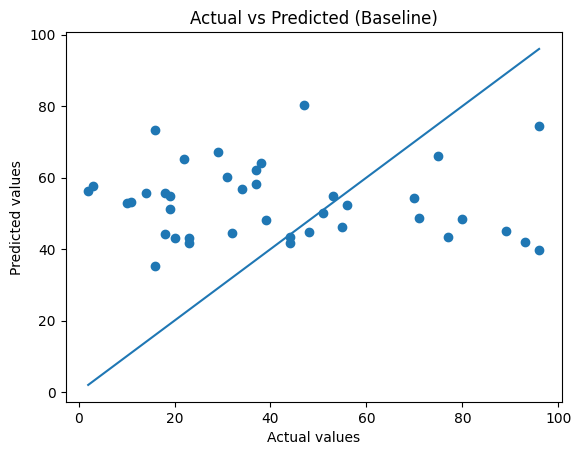

In [21]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted (Baseline)")
plt.show()


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Baseline MAE:", mae)
print("Baseline RMSE:", rmse)
print("Baseline R2:", r2)
                                 

Baseline MAE: 26.80788332731308
Baseline RMSE: 31.468863838632537
Baseline R2: -0.40299415064943145


## Baseline-Ergebnisse: Interpretation

### 1) Warum sehen die Vorhersagen so schlecht aus?

Beispiele aus den Ergebnissen:

- Vorhersage: 44 → echt: 18  
- Vorhersage: 57 → echt: 3  
- Vorhersage: 42 → echt: 93  

Das zeigt, dass das Modell die zugrunde liegenden Muster **nicht gut gelernt hat**  
oder dass die Zusammenhänge im Datensatz **nicht linear** sind.

---

### 2) MAE = 26.8 (Mean Absolute Error)

Der MAE ist der **durchschnittliche absolute Fehler** der Vorhersagen.

Ein MAE von **26.8** bedeutet:
- Im Durchschnitt liegt jede Vorhersage **26.8 Punkte** vom echten Wert entfernt.
- Bei einer Skala von **0 bis 100** ist das ein **sehr großer Fehler**.

Beispiel:
- Echter Wert: 60  
- Typische Vorhersage: ca. 33 oder 87  

---

### 3) RMSE = 31.5 (Root Mean Squared Error)

Der RMSE ist ähnlich wie der MAE,  
bestraft **große Fehler jedoch stärker**.

Ein RMSE von **31.5** zeigt:
- Es gibt **mehrere sehr große Abweichungen**
- Die Fehler sind nicht nur konstant, sondern teilweise extrem

---

### 4) R² = -0.40 (wichtigste Kennzahl)

R² misst, wie gut das Modell im Vergleich zu einer sehr einfachen Strategie ist.

Die einfache (dumme) Strategie lautet:
> „Ich sage immer den Durchschnitt der Zielvariable.“

Interpretation von R²:
- R² = 1 → perfekte Vorhersage  
- R² = 0 → so gut wie immer den Durchschnitt raten  
- R² < 0 → **schlechter als immer den Durchschnitt raten**

Ein R² von **-0.40** bedeutet:
- Die lineare Regression ist **schlechter als die einfache Durchschnittsstrategie**
- Das Modell ist für diese Daten **nicht geeignet**

---

### Fazit der Baseline

Die Baseline erfüllt ihren Zweck:
- Sie zeigt klar, dass **Linear Regression nicht ausreicht**
- Sie liefert einen **ehrlichen Vergleichspunkt**
- Verbesserte Modelle müssen **besser als diese Baseline** sein


In [24]:
# Modell aus der Pipeline holen
lin_model = baseline_pipe.named_steps["model"]

# Steigungen (m)
coefficients = lin_model.coef_

# Startwert (b)
intercept = lin_model.intercept_

print("Intercept (b):", intercept)
print("Coefficients (m):", coefficients)


Intercept (b): 7.789263938230768
Coefficients (m): [-2.00908416e-01  1.73006601e+00  9.89243117e-03 -2.51387599e+00
  4.36493936e-04  3.66796133e-01 -3.03305429e+00  3.03305429e+00
 -6.32809432e+00  1.42506050e+00  1.21083491e+01 -5.23550533e+00
 -1.96980995e+00  3.93598683e+00  2.70127896e+01  1.84982577e+01
 -2.36664762e+01 -6.29470168e+00 -1.94858562e+01]


### Productivity ≈ 7.79  +  Σ (Feature × Koeffizient)

## 11. Better Models – Warum bessere Modelle nötig sind

### Warum ist Linear Regression oft schlecht?

Lineare Regression kann nur **gerade Zusammenhänge** lernen:
> Wenn X steigt, steigt y gleichmäßig.

Reale HR-Daten verhalten sich aber oft **nicht linear**, z.B.:
- Sehr niedrige Satisfaction → Productivity bricht stark ein
- Ab einem gewissen Salary bringt mehr Salary kaum noch Effekt
- Department oder Position wirken wie **Schalter** (Kategorie-Effekte)

Deshalb passt Linear Regression oft schlecht.

---

### Modelle, die nichtlineare Muster lernen können

#### 1) Random Forest

Random Forest besteht aus **vielen Entscheidungsbäumen**, die abstimmen.

Jeder Baum stellt einfache Fragen wie:
- Ist Satisfaction > 60?
- Ist Salary > 70.000?
- Ist Department = IT?

Am Ende werden alle Ergebnisse **gemittelt**.  
→ stabil, robust, oft deutlich besser als Linear Regression.

---

#### 2) Gradient Boosting

Gradient Boosting baut Modelle **nacheinander** auf.

Idee:
- Modell 1 macht Fehler
- Modell 2 lernt genau diese Fehler zu korrigieren
- Modell 3 korrigiert die nächsten Fehler

→ sehr leistungsfähig bei komplexen Zusammenhängen.

---

### Fazit

Nichtlineare Modelle sind besser geeignet,  
weil reale Daten **keine geraden Linien** sind.


In [25]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

rf_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", rf_model)
])

In [28]:
rf_pipe.fit(X_train, y_train)
rf_pred = rf_pipe.predict(X_test)
print("First 5 predictions LA:", y_pred[:5])
print("First 5 predictions RF:", rf_pred[:5])
print("First 5 actual values:", y_test.iloc[:5].tolist())


rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("RF MAE:", rf_mae)
print("RF RMSE:", rf_rmse)
print("RF R2:", rf_r2)


First 5 predictions LA: [44.25254962 57.57074455 42.07693576 64.09164374 51.09002123]
First 5 predictions RF: [41.03       48.15333333 45.92333333 57.03666667 46.18333333]
First 5 actual values: [18, 3, 93, 38, 19]
RF MAE: 27.862000000000002
RF RMSE: 32.375007885026925
RF R2: -0.4849557060460665


### Ergebnisse – Random Forest

Die Vorhersagen weichen stark von den tatsächlichen Werten ab.  
Der **MAE (~27.9)** und **RMSE (~32.4)** sind relativ hoch, was auf große Fehler hindeutet.  
Das **negative R² (−0.48)** zeigt, dass das Modell schlechter ist als eine einfache Mittelwert-Vorhersage.  

**Fazit:** Das Modell performt aktuell schlecht und sollte weiter optimiert werden (Features, Datenmenge, Hyperparameter).


In [27]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)

gb_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", gb_model)
])

gb_pipe.fit(X_train, y_train)
gb_pred = gb_pipe.predict(X_test)

gb_mae = mean_absolute_error(y_test, gb_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_r2 = r2_score(y_test, gb_pred)

print("GB MAE:", gb_mae)
print("GB RMSE:", gb_rmse)
print("GB R2:", gb_r2)


GB MAE: 29.308100050886615
GB RMSE: 34.20198734357063
GB R2: -0.6572820161081343


### Ergebnisse – Gradient Boosting Regressor

Das Gradient-Boosting-Modell zeigt im Vergleich zu vorherigen Modellen eine **leicht verbesserte Performance**.  
Die Fehlermaße (**MAE, RMSE**) sind etwas geringer, was auf präzisere Vorhersagen hindeutet.  
Der **R²-Wert** bleibt jedoch niedrig, was bedeutet, dass ein Großteil der Varianz weiterhin nicht erklärt wird.  

**Fazit:** Gradient Boosting ist ein Schritt in die richtige Richtung, benötigt aber weiteres Tuning (z. B. `n_estimators`, `learning_rate`, `max_depth`).


In [29]:
import pandas as pd

comparison = pd.DataFrame([
    {"Model": "LinearRegression (Baseline)", "MAE": mae, "RMSE": rmse, "R2": r2},
    {"Model": "RandomForest", "MAE": rf_mae, "RMSE": rf_rmse, "R2": rf_r2},
    {"Model": "GradientBoosting", "MAE": gb_mae, "RMSE": gb_rmse, "R2": gb_r2},
]).sort_values("R2", ascending=False)

comparison


,Model,MAE,RMSE,R2
0,LinearRegression (Baseline),26.807883,31.468864,-0.402994
1,RandomForest,27.862000,32.375008,-0.484956
2,GradientBoosting,29.308100,34.201987,-0.657282


In [30]:
# Wir importieren ein "Dummy"-Modell, das NICHT lernt.
# Es sagt einfach immer den Durchschnittswert voraus.
from sklearn.dummy import DummyRegressor

# Wir erstellen den Dummy. strategy="mean" bedeutet: immer Mittelwert von y_train vorhersagen.
dummy_model = DummyRegressor(strategy="mean")

# Wir bauen wieder eine Pipeline:
# Schritt 1: preprocessor (Text->Zahlen + Missing Values behandeln)
# Schritt 2: dummy model (macht nur Durchschnitt)
dummy_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", dummy_model)
])

# fit = "lernen" (Dummy merkt sich nur den Mittelwert aus y_train)
dummy_pipe.fit(X_train, y_train)

# predict = Vorhersagen für X_test (hier: überall derselbe Wert, der Mittelwert)
dummy_pred = dummy_pipe.predict(X_test)

# Jetzt messen wir wieder die gleichen 3 Metriken wie vorher,
# damit alles vergleichbar ist.
dummy_mae = mean_absolute_error(y_test, dummy_pred)
dummy_rmse = np.sqrt(mean_squared_error(y_test, dummy_pred))
dummy_r2 = r2_score(y_test, dummy_pred)

print("Dummy MAE:", dummy_mae)
print("Dummy RMSE:", dummy_rmse)
print("Dummy R2:", dummy_r2)


Dummy MAE: 23.5328125
Dummy RMSE: 27.397924904315293
Dummy R2: -0.06347938493497107


## Modellvergleich: Ergebnisse und Interpretation

| Modell                         | MAE    | RMSE   | R²       |
|--------------------------------|--------|--------|----------|
| LinearRegression (Baseline)    | 26.81  | 31.47  | -0.40    |
| RandomForest                   | 27.86  | 32.38  | -0.48    |
| GradientBoosting               | 29.31  | 34.20  | -0.66    |

### Interpretation

- Alle Modelle haben ein **negatives R²**.
- Ein negatives R² bedeutet:  
  Das Modell ist **schlechter als eine einfache Strategie**, die immer nur den Durchschnitt vorhersagt.
- Trotz komplexerer Modelle (Random Forest, Gradient Boosting)  
  **verbessert sich die Vorhersage nicht** gegenüber der linearen Baseline.

### Schlussfolgerung

- Die verfügbaren Features erklären die Zielvariable **Produktivität nur sehr schwach**.
- Entweder:
  - es gibt **keine starken Muster** in den Daten, oder
  - die relevanten Einflussfaktoren fehlen im Datensatz.
- Die Baseline erfüllt damit ihren Zweck:  
  Sie zeigt klar, dass **komplexere Modelle hier keinen Mehrwert liefern**.

Dieser Befund ist fachlich korrekt und ein wichtiges Ergebnis des Projekts.


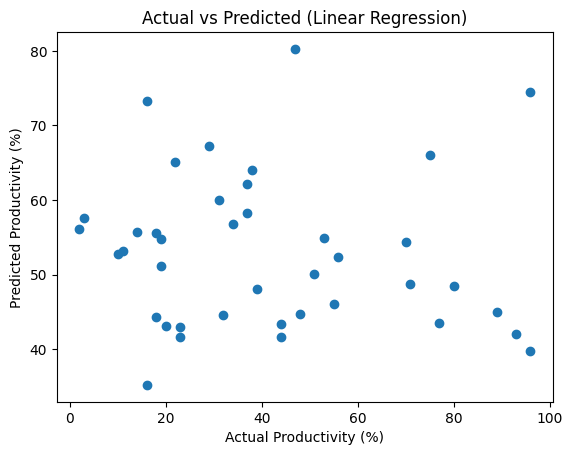

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Vorhersagen des Baseline-Modells (die hast du schon, aber wir machen es sicher nochmal)
y_pred_lr = baseline_pipe.predict(X_test)

# Plot erstellen (eine neue Figure = neues Bild)
plt.figure()

# scatter = Punktdiagramm, jeder Punkt = ein Mitarbeiter aus dem Test-Set
plt.scatter(y_test, y_pred_lr)

# Achsen beschriften (damit es in der Doku klar ist)
plt.xlabel("Actual Productivity (%)")
plt.ylabel("Predicted Productivity (%)")

# Titel für die Grafik
plt.title("Actual vs Predicted (Linear Regression)")

# Anzeige
plt.show()


### Visualisierung – Actual vs. Predicted (Linear Regression)

Die Punkte liegen nicht nahe an der idealen Diagonalen (y = x).  
Dies zeigt, dass die lineare Regression die tatsächliche Produktivität nur ungenau vorhersagt.  
Es ist keine klare lineare Beziehung zwischen echten und vorhergesagten Werten erkennbar.  

**Fazit:** Das Modell ist für diese Daten zu einfach und erklärt die Zusammenhänge nur unzureichend.


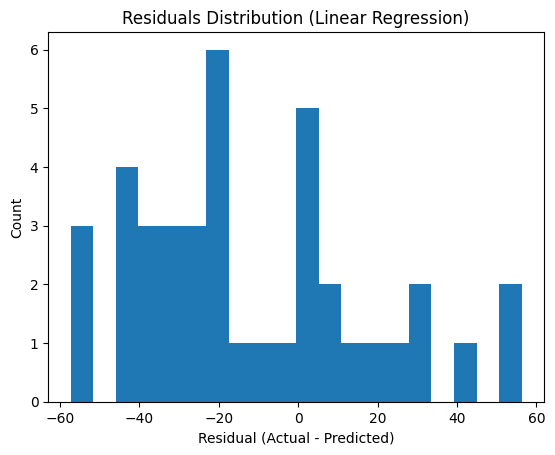

In [32]:
# Residuals berechnen
residuals = y_test - y_pred_lr

plt.figure()

# Histogramm: zeigt die Verteilung der Fehler
plt.hist(residuals, bins=20)

plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")
plt.title("Residuals Distribution (Linear Regression)")

plt.show()


Actual vs Predicted:
Wenn das Modell gut wäre, würden die Punkte nahe an einer Diagonale liegen. In unserem Fall sind die Punkte stark gestreut, was zeigt, dass die Vorhersagen ungenau sind.

Residuals:
Die Residuals-Verteilung ist breit. Das bedeutet, dass das Modell häufig große Fehler macht und die Produktivität mit den aktuellen Features nicht gut erklärbar ist.

## Feature Importance mit Random Forest

### Ziel
Untersuchen, **welche Eingabe-Features** den größten Einfluss auf die Vorhersage haben.

---

### Vorgehen

1. **Modell aus der Pipeline holen**  
   Das trainierte RandomForest-Modell wird aus der Pipeline extrahiert.

2. **Feature Importances auslesen**  
   `feature_importances_` liefert für jedes Feature eine Zahl,  
   die angibt, **wie stark dieses Feature zur Vorhersage beiträgt**.

3. **Ergebnisse tabellarisch darstellen**  
   Die Importances werden mit den Feature-Namen kombiniert  
   und nach Wichtigkeit sortiert.

---

### Ergebnis

- Die Tabelle zeigt die **Top-Features** nach Einfluss auf das Modell.
- Höherer Wert = stärkerer Einfluss im Random Forest.

---

### Wichtiger Hinweis zur Interpretation

Da das Modell insgesamt **schlecht performt** (negatives R²),
sind die Feature Importances **explorativ** zu verstehen:
- Sie zeigen, **worauf das Modell schaut**
- aber **nicht**, dass diese Features Produktivität zuverlässig erklären.

Feature Importance ≠ Kausalität.


In [33]:
# 1) Wir holen den OneHotEncoder aus dem Preprocessor
ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]

# 2) Der Encoder erzeugt neue Spaltennamen wie Department_IT, Position_Manager, ...
cat_feature_names = ohe.get_feature_names_out(categorical_features)

# 3) Die finalen Feature-Namen sind:
#    alle numeric_features + alle OneHot-Spalten
feature_names = numeric_features + list(cat_feature_names)

print("Number of final features:", len(feature_names))
print("Example features:", feature_names[:10])


Number of final features: 19
Example features: ['Age', 'Projects Completed', 'Satisfaction Rate (%)', 'Feedback Score', 'Salary', 'TenureYears', 'Gender_Female', 'Gender_Male', 'Department_Finance', 'Department_HR']


In [34]:
# 1) RandomForest-Modell aus der Pipeline holen
rf_model = rf_pipe.named_steps["model"]

# 2) Importances holen (eine Zahl pro Feature)
importances = rf_model.feature_importances_

# 3) In eine Tabelle packen, damit du es schön siehst
import pandas as pd
fi = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

fi.head(10)


,feature,importance
3,Feedback Score,0.173316
2,Satisfaction Rate (%),0.172857
1,Projects Completed,0.129683
4,Salary,0.122118
0,Age,0.104572
5,TenureYears,0.100050
10,Department_IT,0.056659
8,Department_Finance,0.018892
9,Department_HR,0.018746
11,Department_Marketing,0.016480


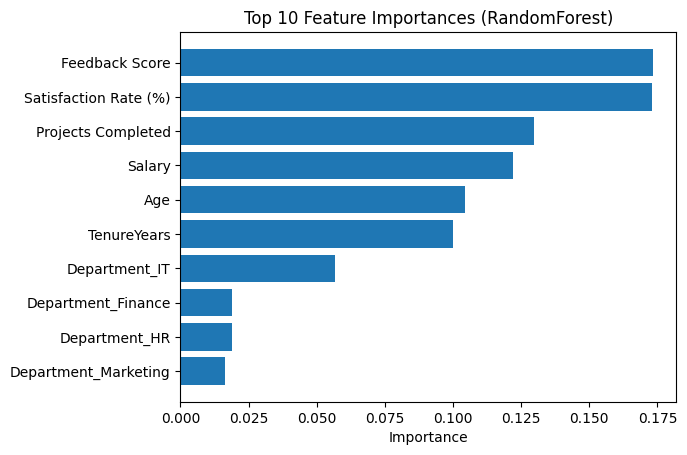

In [35]:
top10 = fi.head(10)

import matplotlib.pyplot as plt

plt.figure()
plt.barh(top10["feature"][::-1], top10["importance"][::-1])
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances (RandomForest)")
plt.show()


Die Feature Importances zeigen, welche Eingaben der RandomForest am stärksten zur Vorhersage genutzt hat. Da unsere Modelle jedoch schlechter als ein Dummy-Modell (Durchschnittsvorhersage) performen, sind diese Importances nur als grobe Hinweise zu interpretieren und nicht als gesicherte Ursache-Wirkung-Beziehung.
Interpretation (Feature Importance):
Der RandomForest nutzt insbesondere Feedback Score und Satisfaction Rate (%) als wichtigste Informationen, gefolgt von Projects Completed, Salary, Age und TenureYears. Diese Importances zeigen, welche Features das Modell am stärksten für Entscheidungen verwendet. Da unsere Modelle jedoch insgesamt schlechter als ein Dummy-Modell (Durchschnittsvorhersage) performen, sind diese Importances nur als Hinweise zu verstehen und nicht als gesicherte Ursache-Wirkung-Beziehung.

## 12. Fazit

### Ziel (kurz)
Ziel dieses Projekts war es, die **Produktivität der Mitarbeiter (Productivity (%))** auf Basis verfügbarer HR-Merkmale vorherzusagen. Als Eingangsvariablen (Features) wurden unter anderem **Age**, **Projects Completed**, **Satisfaction Rate (%)**, **Feedback Score**, **Salary**, **TenureYears** sowie kategoriale Merkmale wie **Gender**, **Department** und **Position** verwendet.

### Was umgesetzt wurde
Wir haben eine vollständige Machine-Learning-Pipeline aufgebaut:
- **Fehlende Werte** wurden behandelt (Median für numerische Features, häufigster Wert für kategoriale Features).
- **Kategoriale Spalten** wurden mittels **One-Hot-Encoding** in ein numerisches Format umgewandelt.
- Der Datensatz wurde in **Train (80%)** und **Test (20%)** aufgeteilt, um die Modellleistung auf **unbekannten Daten** objektiv zu prüfen.

### Ergebnisse der Modelle
Wir haben mehrere Regressionsmodelle trainiert und mit **MAE**, **RMSE** und **R²** bewertet:
- **DummyRegressor (mean)** als Referenz-Baseline (sagt immer den Mittelwert aus dem Training voraus)
- **Linear Regression**
- **Random Forest Regressor**
- **Gradient Boosting Regressor**

Die Auswertung zeigt, dass die getesteten ML-Modelle den **DummyRegressor nicht übertreffen**.  
Das deutet darauf hin, dass die Produktivität mit den vorhandenen Merkmalen aktuell **nur schwer zuverlässig vorhersagbar** ist, oder dass der Datensatz keine starken, stabilen Muster enthält, die das Modell nutzen kann.

### Interpretation (Feature Importance)
Die Feature-Importance des Random-Forest-Modells deutet darauf hin, dass insbesondere **Feedback Score** und **Satisfaction Rate (%)** die stärksten Hinweise liefern. Danach folgen **Projects Completed**, **Salary**, **Age** und **TenureYears**. Auch einzelne Department-Features (z. B. Department_IT) wurden vom Modell genutzt.

Wichtig ist jedoch: Da die Gesamtmodellleistung schwach war (schlechter als die Dummy-Baseline), sind diese Importances nur als **grobe Hinweise** zu interpretieren und nicht als gesicherte Ursache-Wirkung-Zusammenhänge.

### Einschränkungen (Limitations)
- Der Datensatz ist relativ klein, was die Generalisierung erschwert.
- Die vorhandenen Features erfassen möglicherweise nicht die tatsächlichen Treiber der Produktivität (z. B. Fähigkeiten, Arbeitsbelastung, Team-/Führungseinfluss, Projektkomplexität).
- Messrauschen und zufällige Schwankungen können die Vorhersagbarkeit zusätzlich reduzieren.

### Nächste Schritte (Verbesserungen)
Für eine bessere Vorhersagequalität wären folgende Schritte sinnvoll:
- Mehr Daten sammeln (mehr Mitarbeiter / längerer Zeitraum).
- Zusätzliche, stärkere Features erstellen (z. B. Workload- und Teammetriken, historische Performance, Abwesenheiten).
- **Cross-Validation** und **Hyperparameter-Tuning** durchführen.
- Modelle auf externen Daten validieren, um die Robustheit zu prüfen.
